# Analysis

In [163]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from scipy.special import expit as logistic_function

## Unencrypted data

In [6]:
df = pd.read_csv('../data/preprocessed_data.csv')
df

,video_on,num_clients,topology,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,max_bytes,total_packets_in,...,total_packets_out,total_bytes_out,avg_bytes_out,std_bytes_out,median_bytes_out,max_bytes_out,avg_inter_arr,std_inter_arr,median_inter_arr,max_inter_arr
0,False,3.0,hdumb,72331.0,6492047.0,89.754697,26.624026,78.0,546.0,31533.0,...,40798.0,3751315.0,91.948502,28.441660,82.0,359.0,0.006281,0.004844,0.005180,0.104380
1,False,3.0,hdumb,66143.0,6044641.0,91.387464,29.381103,80.0,547.0,31436.0,...,34707.0,3343593.0,96.337713,30.726329,109.0,359.0,0.006287,0.005072,0.005150,0.132999
2,False,3.0,hdumb,64748.0,5871180.0,90.677395,27.837224,78.0,546.0,31432.0,...,33316.0,3155607.0,94.717463,30.608030,104.0,359.0,0.006283,0.004910,0.005263,0.038957
3,False,8.0,hdumb,343012.0,29201537.0,85.132698,22.277256,77.0,547.0,84033.0,...,258979.0,22600016.0,87.265825,22.805335,78.0,359.0,0.002316,0.002009,0.001817,0.031288
4,False,8.0,hdumb,318825.0,26882146.0,84.316305,21.738617,77.0,547.0,83843.0,...,234982.0,20340810.0,86.563269,22.550933,78.0,359.0,0.002321,0.002176,0.001755,0.054932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,3.0,tiered,65003.0,5886799.0,90.561959,27.108087,79.0,547.0,29641.0,...,35362.0,3308969.0,93.574147,29.253844,88.0,359.0,0.006298,0.004652,0.005239,0.089555
72,False,3.0,tiered,60788.0,5518866.0,90.788741,27.799835,79.0,547.0,29926.0,...,30862.0,2938423.0,95.211684,30.605463,104.0,359.0,0.006284,0.004816,0.005122,0.058126
73,True,3.0,tiered,198117.0,92448927.0,466.638032,412.351986,347.0,1214.0,113233.0,...,84884.0,26672584.0,314.223929,307.998272,126.0,1214.0,0.001656,0.001639,0.001178,0.021326
74,True,3.0,tiered,193124.0,91776508.0,475.220625,413.558133,365.0,1214.0,113074.0,...,80050.0,26129597.0,326.415953,312.232944,128.0,1214.0,0.001660,0.001704,0.001167,0.073484


In [16]:
df.dropna(inplace=True)
df['video_on'] = df['video_on'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 75
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_on           72 non-null     int64  
 1   num_clients        72 non-null     float64
 2   topology           72 non-null     object 
 3   total_packets      72 non-null     float64
 4   total_bytes        72 non-null     float64
 5   avg_bytes          72 non-null     float64
 6   std_bytes          72 non-null     float64
 7   median_bytes       72 non-null     float64
 8   max_bytes          72 non-null     float64
 9   total_packets_in   72 non-null     float64
 10  total_bytes_in     72 non-null     float64
 11  avg_bytes_in       72 non-null     float64
 12  std_bytes_in       72 non-null     float64
 13  median_bytes_in    72 non-null     float64
 14  max_bytes_in       72 non-null     float64
 15  total_packets_out  72 non-null     float64
 16  total_bytes_out    72 non-null   

In [17]:
df.groupby(['video_on', 'num_clients']).size()

video_on  num_clients
0         3.0            13
          5.0            12
          8.0            10
1         3.0            12
          5.0            12
          8.0            13
dtype: int64

In [18]:
df.drop(['topology'], axis=1).groupby(['video_on', 'num_clients']).mean()

total_packets   total_bytes   avg_bytes   std_bytes  \
video_on num_clients                                                        
0        3.0           68117.769231  6.149179e+06   90.292228   27.341666   
         5.0          137983.750000  1.207575e+07   87.587806   25.173951   
         8.0          271415.400000  2.303049e+07   82.551642   23.874152   
1        3.0          207171.416667  9.621414e+07  464.552167  412.662273   
         5.0          380215.000000  1.665293e+08  432.958470  410.411508   
         8.0          640098.615385  2.766970e+08  410.624618  384.679019   

                      median_bytes    max_bytes  total_packets_in  \
video_on num_clients                                                
0        3.0             78.769231   546.461538      31025.615385   
         5.0             77.416667   546.666667      49054.500000   
         8.0             74.600000   547.000000      70596.700000   
1        3.0            342.583333  1214.166667     117915.583333   
         5.0            238.416667  1214.166667     179298.333333   
         8.0            262.230769  1212.230769     236114.076923   

                      total_bytes_in  avg_bytes_in  std_bytes_in  ...  \
video_on num_clients                                              ...   
0        3.0            2.687422e+06     86.619331     24.165234  ...   
         5.0            4.003058e+06     81.686389     21.526398  ...   
         8.0            5.521470e+06     75.763236     21.255593  ...   
1        3.0            6.845129e+07    580.516291    442.775119  ...   
         5.0            1.033880e+08    575.343165    452.372006  ...   
         8.0            1.329713e+08    529.358762    436.078206  ...   

                      total_packets_out  total_bytes_out  avg_bytes_out  \
video_on num_clients                                                      
0        3.0               37092.153846     3.461757e+06      93.419573   
         5.0               88929.250000     8.072690e+06      90.941450   
         8.0              200818.700000     1.750902e+07      85.410351   
1        3.0               89255.833333     2.776284e+07     311.331466   
         5.0              200916.666667     6.314134e+07     297.880788   
         8.0              403984.538462     1.437257e+08     326.885552   

                      std_bytes_out  median_bytes_out  max_bytes_out  \
video_on num_clients                                                   
0        3.0              29.387349         90.076923     358.153846   
         5.0              26.467867         80.083333     358.250000   
         8.0              24.112066         75.300000     358.100000   
1        3.0             308.167160        124.583333    1214.000000   
         5.0             306.763291        132.000000    1214.083333   
         8.0             313.656392        190.615385    1184.153846   

                      avg_inter_arr  std_inter_arr  median_inter_arr  \
video_on num_clients                                                   
0        3.0               0.006314       0.005593          0.005701   
         5.0               0.004002       0.003767          0.002933   
         8.0               0.024198       0.023612          0.015265   
1        3.0               0.001660       0.002135          0.000934   
         5.0               0.001095       0.001526          0.000628   
         8.0               0.007275       0.008134          0.004595   

                      max_inter_arr  
video_on num_clients                 
0        3.0               0.163440  
         5.0               0.090238  
         8.0               0.148006  
1        3.0               0.118430  
         5.0               0.112304  
         8.0               0.095288  

[6 rows x 22 columns]

In [20]:
# logistic regression
# X = df.drop(['topology', 'video_on', 'num_clients'], axis=1)
X = df[['avg_bytes']]
X = sm.add_constant(X)
y = df['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations 25


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        21:50:03   Log-Likelihood:                 0.0000
converged:                       True   LL-Null:                       -49.879
Covariance Type:            nonrobust   LLR p-value:                 1.722e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1498.4024      1e+21  -1.49e-18      1.000   -1.97e+21    1.97e+21
avg_bytes     15.4737    1.1e+19   1.41e-18      1.000   -2.15e+19    2.15e+19
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

## Encrypted data

### EDA

In [122]:
df_en = pd.read_csv('../data/preprocessed_data_encrypted.csv')
df_en

,video_on,num_clients,topology,vpn,vpn_topology,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,...,total_packets_out,total_bytes_out,avg_bytes_out,std_bytes_out,median_bytes_out,max_bytes_out,avg_inter_arr,std_inter_arr,median_inter_arr,max_inter_arr
0,False,3,hdumb,ipsec,sts,78058,19889600,254.805401,355.695674,144.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,3,hdumb,ipsec,sts,78752,20023796,254.263968,356.137637,144.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,3,hdumb,ipsec,sts,78322,20024832,255.673144,354.039984,148.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,8,hdumb,ipsec,sts,369923,76635896,207.167156,274.104510,140.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,8,hdumb,ipsec,sts,354597,74016220,208.733351,279.485591,140.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,False,3,tiered,ipsec,sts,78071,19920524,255.159073,357.691380,144.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,False,3,tiered,ipsec,sts,78268,19980948,255.288854,357.237332,144.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,True,3,tiered,ipsec,sts,218203,120200164,550.863939,436.794183,424.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,True,3,tiered,ipsec,sts,214870,119552382,556.394015,436.994796,436.0,...,0,0,NaN,NaN,NaN,NaN,0.002089,0.002308,0.001315,0.007799


In [126]:
# Count the records with total_packets_in is not NaN
df_en['avg_bytes_in'].notna().sum()

72

In [97]:
df_en = df_en.iloc[:, :11]
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_on       175 non-null    bool   
 1   num_clients    175 non-null    int64  
 2   topology       175 non-null    object 
 3   vpn            175 non-null    object 
 4   vpn_topology   175 non-null    object 
 5   total_packets  175 non-null    int64  
 6   total_bytes    175 non-null    int64  
 7   avg_bytes      175 non-null    float64
 8   std_bytes      175 non-null    float64
 9   median_bytes   175 non-null    float64
 10  max_bytes      175 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 14.0+ KB


In [98]:
df_en.describe()

,num_clients,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,max_bytes
count,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.00000
mean,5.257143,327901.582857,1.429804e+08,371.216185,359.542178,253.680000,1471.20000
std,2.039028,276998.313377,1.511246e+08,183.088502,138.708641,181.632446,13.03576
min,3.000000,9085.000000,1.005746e+06,85.480782,30.263820,77.000000,1452.00000
25%,3.000000,105566.500000,2.407756e+07,215.961508,310.615656,140.000000,1452.00000
50%,5.000000,242137.000000,7.505303e+07,460.601483,418.192284,148.000000,1480.00000
75%,8.000000,451814.500000,2.366878e+08,537.376448,436.815762,414.000000,1480.00000
max,8.000000,992056.000000,5.093500e+08,838.362663,663.136607,1452.000000,1480.00000


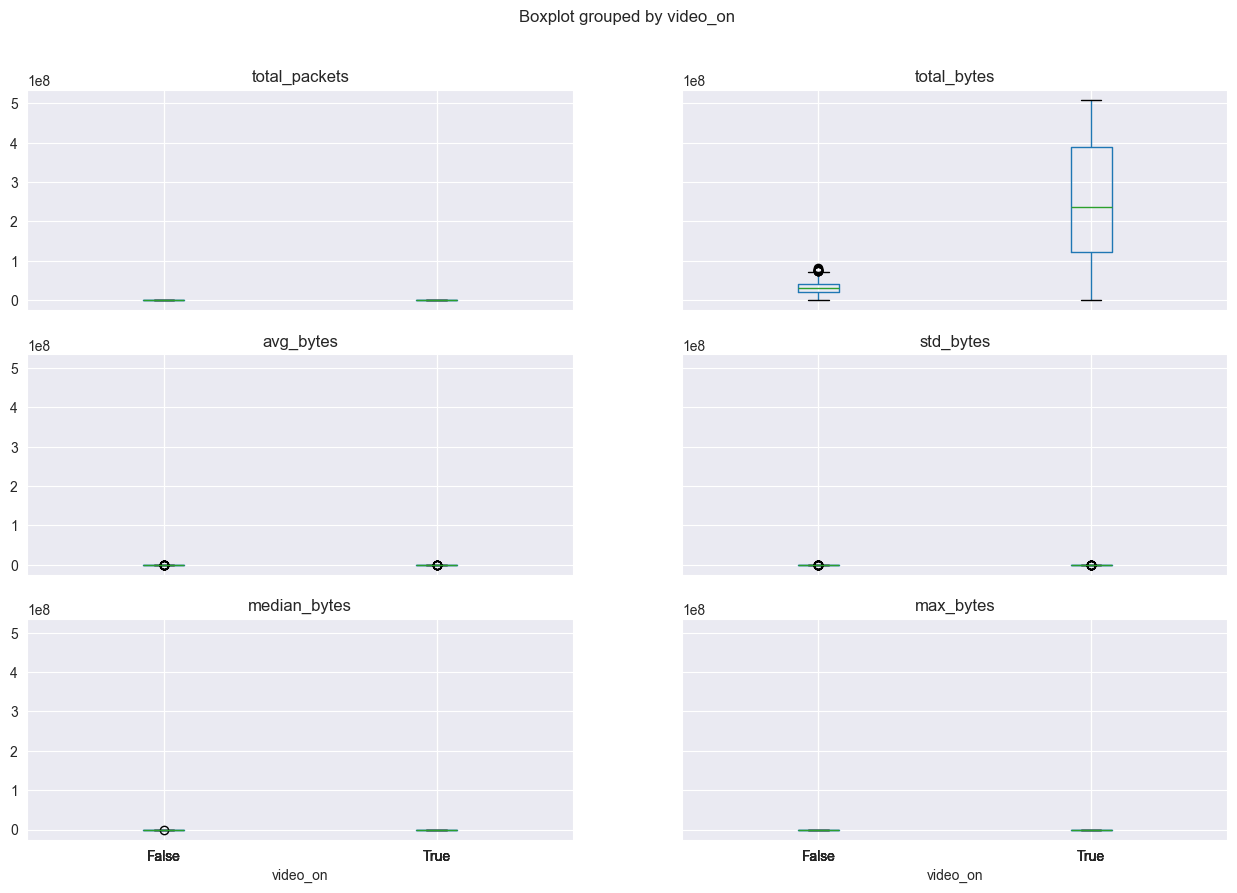

In [99]:
# Box plot for total_packets, total_bytes, avg_bytes, std_bytes, median_bytes, max_bytes, min_bytes
df_en.boxplot(column=['total_packets', 'total_bytes', 'avg_bytes', 'std_bytes', 'median_bytes', 'max_bytes'], by='video_on', figsize=(15, 10))
plt.show()

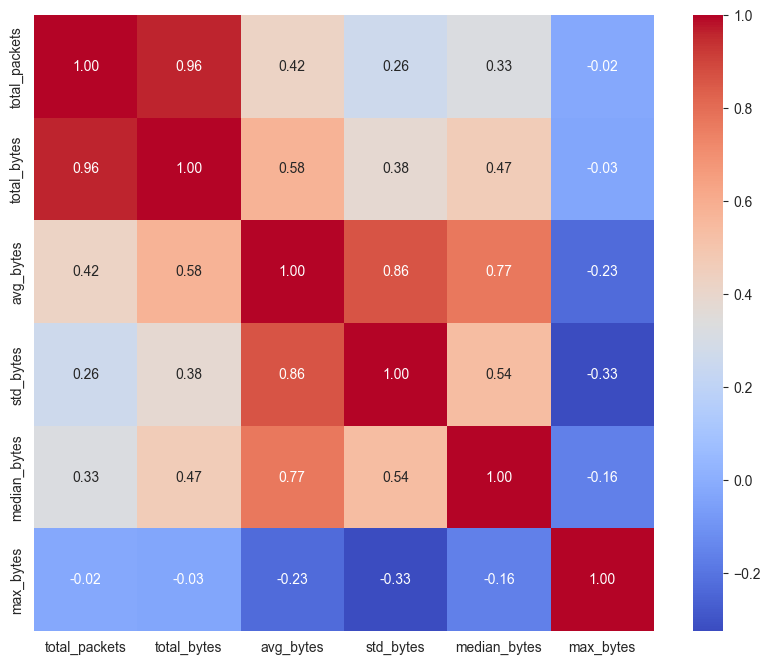

In [100]:
# Correlation matrix
corr = df_en[['total_packets', 'total_bytes', 'avg_bytes', 'std_bytes', 'median_bytes', 'max_bytes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [101]:
df_en['video_on'] = df_en['video_on'].astype(int)

In [49]:
df_en.drop(['topology', 'vpn', 'vpn_topology'], axis=1).groupby(['video_on', 'num_clients']).mean()

total_packets   total_bytes   avg_bytes   std_bytes  \
video_on num_clients                                                        
0        3             60042.666667  1.683051e+07  303.805537  369.947098   
         5            152163.200000  3.195206e+07  202.746641  280.349331   
         8            327875.833333  5.818194e+07  173.172822  219.136665   
1        3            160275.433333  8.596034e+07  469.870314  399.010234   
         5            405431.300000  2.150882e+08  531.322897  435.307068   
         8            844399.322581  4.235568e+08  502.397513  423.296430   

                      median_bytes    max_bytes  
video_on num_clients                             
0        3              174.866667  1471.600000  
         5              119.166667  1471.600000  
         8              117.750000  1469.500000  
1        3              317.266667  1471.600000  
         5              426.800000  1471.600000  
         8              336.290323  1470.967742

### Base Models

In [114]:
X = df_en[['total_packets', 'std_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.423433
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      172
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.3884
Time:                        15:56:23   Log-Likelihood:                -74.101
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 3.649e-21
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0924      0.938     -5.428      0.000      -6.931      -3.254
total_packets  7.395e-06   1.47e-06      5.016      0.000    4.51e-06    1.03e-05
std_bytes         0.0083      0.002      4.330      0.000       0.005       0.012
=================================================================================
"""

In [115]:
X = df_en[['avg_bytes', 'median_bytes', 'total_packets']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.300937
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.5653
Time:                        15:56:42   Log-Likelihood:                -52.664
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.681e-29
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0194      0.700     -7.174      0.000      -6.391      -3.648
avg_bytes         0.0079      0.002      3.785      0.000       0.004       0.012
median_bytes      0.0030      0.003      1.107      0.268      -0.002       0.008
total_packets  5.101e-06   1.64e-06      3.104      0.002    1.88e-06    8.32e-06
=================================================================================
"""

In [116]:
X = df_en[['total_packets', 'total_bytes', 'avg_bytes', 'std_bytes', 'median_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.040557
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.9414
Time:                        15:56:46   Log-Likelihood:                -7.0975
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 2.696e-47
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.7241     22.351      1.911      0.056      -1.083      86.532
total_packets    -0.0026      0.001     -2.007      0.045      -0.005   -6.17e-05
total_bytes    5.855e-06   2.91e-06      2.010      0.044    1.47e-07    1.16e-05
avg_bytes        -0.3028      0.155     -1.951      0.051      -0.607       0.001
std_bytes         0.2967      0.154      1.930      0.054      -0.005       0.598
median_bytes     -0.2158      0.127     -1.702      0.089      -0.464       0.033
=================================================================================

Possibly complete quasi-separation: A fraction 0.87 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [117]:
X = df_en[['total_packets', 'total_bytes', 'avg_bytes', 'std_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.042233
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.9390
Time:                        15:56:55   Log-Likelihood:                -7.3908
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 4.469e-48
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.9454     12.405      2.011      0.044       0.631      49.260
total_packets    -0.0024      0.001     -2.035      0.042      -0.005    -8.9e-05
total_bytes    5.375e-06   2.64e-06      2.040      0.041    2.11e-07    1.05e-05
avg_bytes        -0.3053      0.155     -1.971      0.049      -0.609      -0.002
std_bytes         0.2707      0.139      1.949      0.051      -0.002       0.543
=================================================================================

Possibly complete quasi-separation: A fraction 0.89 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [86]:
X = df_en[['num_clients', 'total_packets', 'total_bytes', 'avg_bytes', 'std_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.039956
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.9423
Time:                        14:39:07   Log-Likelihood:                -6.9923
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 2.430e-47
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -35.9512     25.372     -1.417      0.156     -85.679      13.777
num_clients      19.7044     11.567      1.703      0.088      -2.967      42.376
total_packets    -0.0022      0.001     -2.034      0.042      -0.004   -8.04e-05
total_bytes    4.642e-06   2.27e-06      2.042      0.041    1.86e-07     9.1e-06
avg_bytes        -0.3174      0.162     -1.956      0.050      -0.635       0.001
std_bytes         0.2911      0.150      1.935      0.053      -0.004       0.586
=================================================================================

Possibly complete quasi-separation: A fraction 0.88 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [119]:
X = df_en[['num_clients', 'total_packets', 'total_bytes', 'avg_bytes', 'std_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.039956
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.9423
Time:                        16:03:50   Log-Likelihood:                -6.9923
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 2.430e-47
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -35.9512     25.372     -1.417      0.156     -85.679      13.777
num_clients      19.7044     11.567      1.703      0.088      -2.967      42.376
total_packets    -0.0022      0.001     -2.034      0.042      -0.004   -8.04e-05
total_bytes    4.642e-06   2.27e-06      2.042      0.041    1.86e-07     9.1e-06
avg_bytes        -0.3174      0.162     -1.956      0.050      -0.635       0.001
std_bytes         0.2911      0.150      1.935      0.053      -0.004       0.586
=================================================================================

Possibly complete quasi-separation: A fraction 0.88 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [120]:
# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,33.885777
1,num_clients,8.489093
2,total_packets,85.480373
3,total_bytes,65.636713
4,avg_bytes,8.171706
5,std_bytes,5.058139


In [87]:
# calculate train accuracy
predicted_probs = result.predict(X)
pred_labels = (predicted_probs > 0.5).astype(int)
actual_labels = y
accuracy = (pred_labels == actual_labels).mean()
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.9886


In [128]:
X = df_en[['avg_bytes', 'std_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.250315
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      172
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6385
Time:                        16:09:01   Log-Likelihood:                -43.805
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 2.540e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3285      0.536     -4.346      0.000      -3.379      -1.278
avg_bytes      0.0307      0.005      6.207      0.000       0.021       0.040
std_bytes     -0.0250      0.005     -4.710      0.000      -0.035      -0.015
==============================================================================
"""

In [129]:
# Check for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,7.925655
1,avg_bytes,3.895507
2,std_bytes,3.895507


In [141]:
X = df_en[['avg_bytes']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.357859
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.4831
Time:                        16:35:03   Log-Likelihood:                -62.625
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 2.770e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1318      0.232      0.568      0.570      -0.323       0.587
avg_bytes      2.2842      0.286      7.993      0.000       1.724       2.844
==============================================================================
"""

In [142]:
X = df_en[['avg_bytes', 'num_clients']]
X = sm.add_constant(X)
y = df_en['video_on']

logit_model = sm.Logit(y, X)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354053
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      172
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.4886
Time:                        16:35:19   Log-Likelihood:                -61.959
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.946e-26
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1238      0.234      0.528      0.597      -0.336       0.583
avg_bytes       2.2764      0.282      8.066      0.000       1.723       2.830
num_clients     0.2705      0.236      1.146      0.252      -0.192       0.733
===============================================================================
"""

## Interaction term (num_clients as numerical)

In [177]:
df_en = pd.read_csv('../data/preprocessed_data_encrypted.csv')
df_en = df_en.iloc[:, :11]
df_en.drop(['topology', 'vpn', 'vpn_topology'], axis=1, inplace=True)
df_en.dropna(inplace=True)
df_en['video_on'] = df_en['video_on'].astype(int)
df_en

,video_on,num_clients,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,max_bytes
0,0,3,78058,19889600,254.805401,355.695674,144.0,1480
1,0,3,78752,20023796,254.263968,356.137637,144.0,1480
2,0,3,78322,20024832,255.673144,354.039984,148.0,1480
3,0,8,369923,76635896,207.167156,274.104510,140.0,1480
4,0,8,354597,74016220,208.733351,279.485591,140.0,1480
...,...,...,...,...,...,...,...,...
170,0,3,78071,19920524,255.159073,357.691380,144.0,1480
171,0,3,78268,19980948,255.288854,357.237332,144.0,1480
172,1,3,218203,120200164,550.863939,436.794183,424.0,1480
173,1,3,214870,119552382,556.394015,436.994796,436.0,1480


In [178]:
formula = 'video_on ~ avg_bytes + num_clients + avg_bytes * num_clients'
model = smf.logit(formula=formula, data=df_en)
result = model.fit()
result.summary()

         Current function value: 0.207528
         Iterations: 35


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.7003
Time:                        17:38:59   Log-Likelihood:                -36.317
converged:                      False   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.487e-36
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               250.8507        nan        nan        nan         nan         nan
avg_bytes                -0.6185   2.02e+04  -3.06e-05      1.000   -3.97e+04    3.97e+04
num_clients             -84.1918        nan        nan        nan         nan         nan
avg_bytes:num_clients     0.2077   6745.660   3.08e-05      1.000   -1.32e+04    1.32e+04
=========================================================================================

Possibly complete quasi-separation: A fraction 0.66 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [181]:
# L1 regularization
# Standardize the features
scaler = MinMaxScaler()
df_en[['avg_bytes', 'num_clients']] = scaler.fit_transform(df_en[['avg_bytes', 'num_clients']])
print(df_en[['avg_bytes', 'num_clients']].head())

# Apply L1 regularization
formula = 'video_on ~ avg_bytes + num_clients + avg_bytes * num_clients'
model = smf.logit(formula=formula, data=df_en)
result = model.fit_regularized(method='l1', alpha=0.1)
result.summary()

   avg_bytes  num_clients
0   0.224902          0.0
1   0.224183          0.0
2   0.226055          0.0
3   0.161627          1.0
4   0.163708          1.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24879546409596204
            Iterations: 69
            Function evaluations: 69
            Gradient evaluations: 69


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6847
Time:                        17:39:25   Log-Likelihood:                -38.204
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 9.704e-36
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.4605      0.537     -2.718      0.007      -2.514      -0.407
avg_bytes                 3.6262      1.148      3.159      0.002       1.376       5.876
num_clients             -12.7967      4.187     -3.056      0.002     -21.004      -4.590
avg_bytes:num_clients    35.4657     10.060      3.526      0.000      15.749      55.182
=========================================================================================
"""

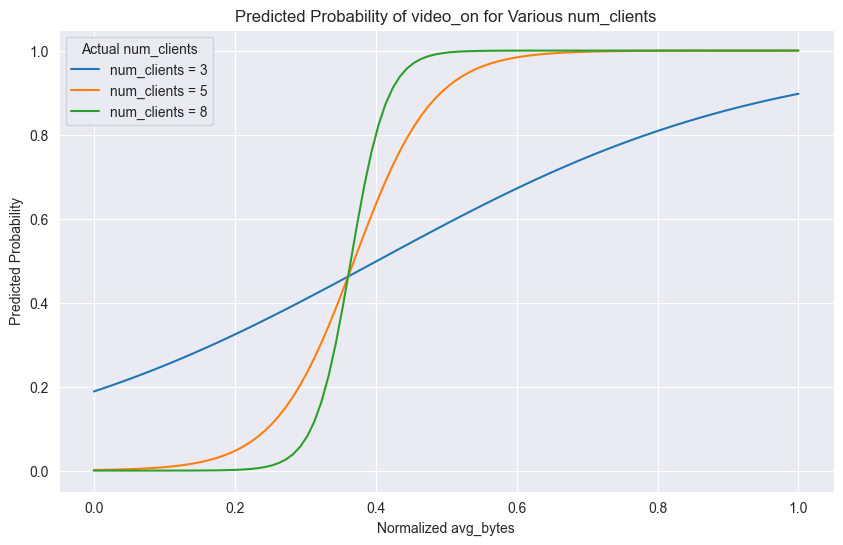

In [182]:
# Obtain the coefficients from the model result
params = result.params

# Create a range of normalized values for avg_bytes for plotting
avg_bytes_values = np.linspace(0, 1, 100)  # Normalized range

# Actual num_clients and their corresponding normalized values
num_clients_actual = [3, 5, 8]
num_clients_normalized = [0.0, 0.4, 1.0]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Calculate predicted probabilities and plot for each num_clients value
for actual, normalized in zip(num_clients_actual, num_clients_normalized):
    # Calculate the log-odds using the regression equation
    log_odds = (params['Intercept'] +
                params['avg_bytes'] * avg_bytes_values +
                params['num_clients'] * normalized +
                params['avg_bytes:num_clients'] * avg_bytes_values * normalized)

    # Convert log-odds to probabilities
    probabilities = logistic_function(log_odds)

    # Plot
    plt.plot(avg_bytes_values, probabilities, label=f'num_clients = {actual}')

# Customize the plot
plt.title('Predicted Probability of video_on for Various num_clients')
plt.xlabel('Normalized avg_bytes')
plt.ylabel('Predicted Probability')
plt.legend(title='Actual num_clients')
plt.grid(True)
plt.show()

In [170]:
# L1 regularization
# Standardize the features
scaler = MinMaxScaler()
df_en[['std_bytes', 'num_clients']] = scaler.fit_transform(df_en[['std_bytes', 'num_clients']])
print(df_en[['std_bytes', 'num_clients']].head())

# Apply L1 regularization
formula = 'video_on ~ std_bytes + num_clients + std_bytes * num_clients'
model = smf.logit(formula=formula, data=df_en)
result = model.fit_regularized(method='l1', alpha=0.1)
result.summary()

   std_bytes  num_clients
0   0.514214          0.0
1   0.514912          0.0
2   0.511598          0.0
3   0.385292          1.0
4   0.393794          1.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35053266900962476
            Iterations: 75
            Function evaluations: 76
            Gradient evaluations: 75


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.5868
Time:                        17:33:18   Log-Likelihood:                -50.067
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.276e-30
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5523      0.626     -0.882      0.378      -1.780       0.675
std_bytes                 0.8879      1.013      0.876      0.381      -1.098       2.874
num_clients             -39.9180      9.901     -4.032      0.000     -59.323     -20.513
std_bytes:num_clients    71.4005     16.609      4.299      0.000      38.848     103.953
=========================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

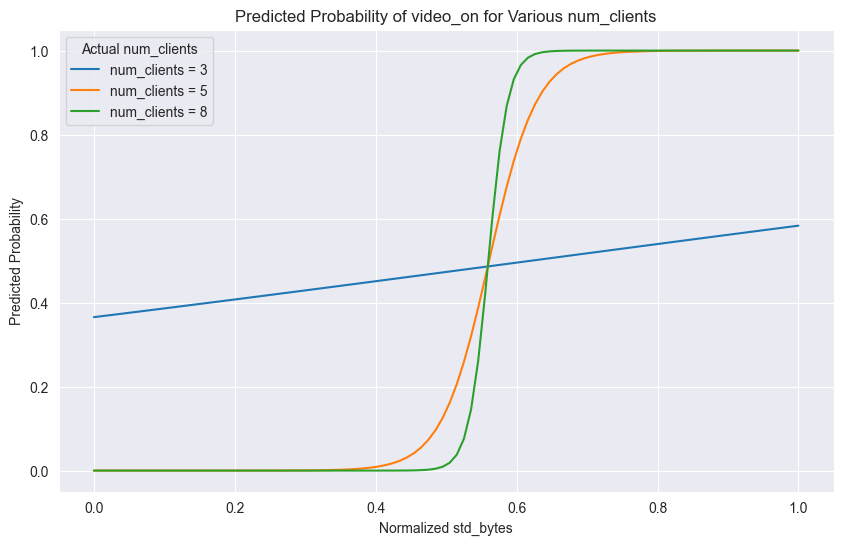

In [171]:
# Obtain the coefficients from the model result
params = result.params

std_bytes_values = np.linspace(0, 1, 100)  # Normalized range

# Actual num_clients and their corresponding normalized values
num_clients_actual = [3, 5, 8]
num_clients_normalized = [0.0, 0.4, 1.0]

# Initialize a plot
plt.figure(figsize=(10, 6))

# Calculate predicted probabilities and plot for each num_clients value
for actual, normalized in zip(num_clients_actual, num_clients_normalized):
    # Calculate the log-odds using the regression equation
    log_odds = (params['Intercept'] +
                params['std_bytes'] * std_bytes_values +
                params['num_clients'] * normalized +
                params['std_bytes:num_clients'] * std_bytes_values * normalized)

    # Convert log-odds to probabilities
    probabilities = logistic_function(log_odds)

    # Plot
    plt.plot(avg_bytes_values, probabilities, label=f'num_clients = {actual}')

# Customize the plot
plt.title('Predicted Probability of video_on for Various num_clients')
plt.xlabel('Normalized std_bytes')
plt.ylabel('Predicted Probability')
plt.legend(title='Actual num_clients')
plt.grid(True)
plt.show()

In [157]:
# L1 regularization
# Standardize the features
scaler = MinMaxScaler()
df_en[['std_bytes', 'avg_bytes', 'num_clients']] = scaler.fit_transform(df_en[['std_bytes', 'avg_bytes', 'num_clients']])

# Apply L1 regularization
formula = 'video_on ~ avg_bytes + std_bytes + num_clients + avg_bytes * num_clients + std_bytes * num_clients'
model = smf.logit(formula=formula, data=df_en)
result = model.fit_regularized(method='l1', alpha=0.1)
result.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.18153857368525267
            Iterations: 114
            Function evaluations: 114
            Gradient evaluations: 114


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.7930
Time:                        17:01:45   Log-Likelihood:                -25.077
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.813e-40
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9319      0.695      1.340      0.180      -0.431       2.295
avg_bytes                16.1500      3.755      4.301      0.000       8.790      23.510
std_bytes               -13.6041      3.539     -3.844      0.000     -20.541      -6.668
num_clients              -9.0684      3.508     -2.585      0.010     -15.945      -2.192
avg_bytes:num_clients    27.1697      8.873      3.062      0.002       9.780      44.560
std_bytes:num_clients          0        nan        nan        nan         nan         nan
=========================================================================================
"""

In [158]:
# L1 regularization
# Standardize the features
scaler = MinMaxScaler()
df_en[['std_bytes', 'avg_bytes', 'num_clients']] = scaler.fit_transform(df_en[['std_bytes', 'avg_bytes', 'num_clients']])

# Apply L1 regularization
formula = 'video_on ~ avg_bytes + std_bytes + num_clients + avg_bytes * num_clients'
model = smf.logit(formula=formula, data=df_en)
result = model.fit_regularized(method='l1', alpha=0.1)
result.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1815385736557965
            Iterations: 92
            Function evaluations: 92
            Gradient evaluations: 92


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                  175
Model:                          Logit   Df Residuals:                      170
Method:                           MLE   Df Model:                            4
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.7930
Time:                        17:02:07   Log-Likelihood:                -25.077
converged:                       True   LL-Null:                       -121.16
Covariance Type:            nonrobust   LLR p-value:                 1.813e-40
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9319      0.695      1.340      0.180      -0.431       2.295
avg_bytes                16.1497      3.755      4.301      0.000       8.790      23.509
std_bytes               -13.6039      3.539     -3.844      0.000     -20.540      -6.667
num_clients              -9.0684      3.508     -2.585      0.010     -15.944      -2.192
avg_bytes:num_clients    27.1695      8.873      3.062      0.002       9.780      44.559
=========================================================================================
"""

## Interaction term (num_clients as categorical (dummy variables))

In [159]:
df_en['num_clients'] = df_en['num_clients'].astype('category')
dummies = pd.get_dummies(df['num_clients'], prefix='D', drop_first=True)
# change column names
dummies.columns = ['D_5', 'D_8']
df_dummies = pd.concat([df_en, dummies], axis=1)
df_dummies

,video_on,num_clients,topology,vpn,vpn_topology,total_packets,total_bytes,avg_bytes,std_bytes,median_bytes,...,avg_bytes_out,std_bytes_out,median_bytes_out,max_bytes_out,avg_inter_arr,std_inter_arr,median_inter_arr,max_inter_arr,D_5,D_8
0,0,0.0,hdumb,ipsec,sts,78058,19889600,0.224902,0.514214,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,0,0.0,hdumb,ipsec,sts,78752,20023796,0.224183,0.514912,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,0,0.0,hdumb,ipsec,sts,78322,20024832,0.226055,0.511598,148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,0,1.0,hdumb,ipsec,sts,369923,76635896,0.161627,0.385292,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,0,1.0,hdumb,ipsec,sts,354597,74016220,0.163708,0.393794,140.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,0,0.0,tiered,ipsec,sts,78071,19920524,0.225372,0.517367,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,0,0.0,tiered,ipsec,sts,78268,19980948,0.225544,0.516650,144.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,1,0.0,tiered,ipsec,sts,218203,120200164,0.618136,0.642357,424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,1,0.0,tiered,ipsec,sts,214870,119552382,0.625481,0.642674,436.0,...,NaN,NaN,NaN,NaN,0.002089,0.002308,0.001315,0.007799,NaN,NaN


In [160]:
# scaler = MinMaxScaler()
# df_dummies[['std_bytes', 'avg_bytes']] = scaler.fit_transform(df_dummies[['std_bytes', 'avg_bytes']])

formula = 'video_on ~ avg_bytes + D_5 + D_8'
model = smf.logit(formula=formula, data=df_dummies)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.335474
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.5160
Time:                        17:06:25   Log-Likelihood:                -24.154
converged:                       True   LL-Null:                       -49.907
Covariance Type:            nonrobust   LLR p-value:                 3.819e-11
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.9136      0.742     -3.928      0.000      -4.367      -1.460
D_5[T.True]     0.5744      0.859      0.669      0.504      -1.109       2.258
D_8[T.True]    -0.2170      1.029     -0.211      0.833      -2.235       1.800
avg_bytes       9.9117      2.132      4.649      0.000       5.733      14.090
===============================================================================
"""

In [161]:
formula = 'video_on ~ std_bytes + D_5 + D_8'
model = smf.logit(formula=formula, data=df_dummies)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.510466
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.2636
Time:                        17:06:58   Log-Likelihood:                -36.754
converged:                       True   LL-Null:                       -49.907
Covariance Type:            nonrobust   LLR p-value:                 8.229e-06
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.0509      0.868     -3.514      0.000      -4.752      -1.349
D_5[T.True]     0.4871      0.686      0.710      0.478      -0.858       1.832
D_8[T.True]     0.6868      0.721      0.952      0.341      -0.727       2.100
std_bytes       6.1253      1.566      3.911      0.000       3.056       9.195
===============================================================================
"""

In [162]:
scaler = MinMaxScaler()
df_dummies[['std_bytes', 'avg_bytes']] = scaler.fit_transform(df_dummies[['std_bytes', 'avg_bytes']])

formula = 'video_on ~ avg_bytes + D_5 + D_8 + avg_bytes * D_5 + avg_bytes * D_8'
model = smf.logit(formula=formula, data=df_dummies)
result = model.fit_regularized(method='l1', alpha=0.1)
result.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3367292401355996
            Iterations: 82
            Function evaluations: 82
            Gradient evaluations: 82


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.5569
Time:                        17:07:55   Log-Likelihood:                -22.113
converged:                       True   LL-Null:                       -49.907
Covariance Type:            nonrobust   LLR p-value:                 9.882e-11
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.3754      0.843     -2.817      0.005      -4.028      -0.722
D_5[T.True]               0.5062      1.192      0.425      0.671      -1.829       2.842
D_8[T.True]              -2.6734      2.541     -1.052      0.293      -7.653       2.306
avg_bytes                 7.4680      2.918      2.559      0.010       1.749      13.187
avg_bytes:D_5[T.True]     0.1035      4.056      0.026      0.980      -7.847       8.054
avg_bytes:D_8[T.True]     8.1893      6.776      1.209      0.227      -5.091      21.469
=========================================================================================
"""

In [77]:
formula = '''
video_on ~ total_bytes + avg_bytes + D_5 + D_8 +
           total_bytes * D_5 + total_bytes * D_8 +
           avg_bytes * D_5 + avg_bytes * D_8
'''
model = smf.logit(formula=formula, data=df_dummies)
result = model.fit()
result.summary()

         Current function value: 0.266217
         Iterations: 35


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6159
Time:                        14:30:39   Log-Likelihood:                -19.168
converged:                      False   LL-Null:                       -49.907
Covariance Type:            nonrobust   LLR p-value:                 2.389e-10
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.2741      1.140     -2.873      0.004      -5.508      -1.040
D_5[T.True]                 2.1696      1.897      1.144      0.253      -1.548       5.887
D_8[T.True]               -42.6918   7547.823     -0.006      0.995   -1.48e+04    1.48e+04
total_bytes             -2.926e-08    2.5e-08     -1.171      0.242   -7.82e-08    1.97e-08
total_bytes:D_5[T.True]  4.964e-08   2.98e-08      1.663      0.096   -8.85e-09    1.08e-07
total_bytes:D_8[T.True]  9.942e-08      0.000      0.001      0.999      -0.000       0.000
avg_bytes                   0.0155      0.007      2.322      0.020       0.002       0.029
avg_bytes:D_5[T.True]      -0.0190      0.012     -1.556      0.120      -0.043       0.005
avg_bytes:D_8[T.True]       0.0944     49.035      0.002      0.998     -96.012      96.201
===========================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [83]:
formula = '''
video_on ~ total_bytes + D_5 + D_8 +
           total_bytes * D_5 + total_bytes * D_8
'''
model = smf.logit(formula=formula, data=df_dummies)
result = model.fit()
result.summary()

         Current function value: 0.317260
         Iterations: 35


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.5423
Time:                        14:36:40   Log-Likelihood:                -22.843
converged:                      False   LL-Null:                       -49.907
Covariance Type:            nonrobust   LLR p-value:                 1.973e-10
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.8706      0.821     -2.279      0.023      -3.479      -0.262
D_5[T.True]                 0.3021      1.092      0.277      0.782      -1.838       2.442
D_8[T.True]               -78.4270   1.91e+05     -0.000      1.000   -3.75e+05    3.75e+05
total_bytes              2.222e-08   1.08e-08      2.051      0.040    9.84e-10    4.35e-08
total_bytes:D_5[T.True] -6.539e-09   1.29e-08     -0.509      0.611   -3.17e-08    1.87e-08
total_bytes:D_8[T.True]  6.967e-07      0.002      0.000      1.000      -0.003       0.003
===========================================================================================

Possibly complete quasi-separation: A fraction 0.32 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [95]:
formula = '''
video_on ~ avg_bytes + total_packets + D_5 + D_8 +
           avg_bytes * D_5 + avg_bytes * D_8 +
              total_packets * D_5 + total_packets * D_8
'''
model = smf.logit(formula=formula, data=df_dummies)
result = model.fit()
result.summary()

         Current function value: 0.227867
         Iterations: 35


/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               video_on   No. Observations:                   72
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            8
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.6713
Time:                        14:50:04   Log-Likelihood:                -16.406
converged:                      False   LL-Null:                       -49.907
Covariance Type:            nonrobust   LLR p-value:                 1.939e-11
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -23.1434     22.663     -1.021      0.307     -67.562      21.275
D_5[T.True]                  20.2957     22.695      0.894      0.371     -24.186      64.777
D_8[T.True]                 -34.4331   3.92e+04     -0.001      0.999   -7.69e+04    7.68e+04
avg_bytes                     0.2568      0.253      1.016      0.310      -0.239       0.752
avg_bytes:D_5[T.True]        -0.2469      0.253     -0.976      0.329      -0.743       0.249
avg_bytes:D_8[T.True]        -0.0987    141.213     -0.001      0.999    -276.872     276.674
total_packets                -0.0005      0.001     -1.005      0.315      -0.002       0.001
total_packets:D_5[T.True]     0.0005      0.001      1.006      0.314      -0.001       0.002
total_packets:D_8[T.True]     0.0005      0.114      0.005      0.996      -0.222       0.223
=============================================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [84]:
predicted_probs = result.predict(df_dummies)

# Step 2: Convert probabilities to class labels using a threshold of 0.5
predicted_labels = (predicted_probs > 0.5).astype(int)

# Step 3: Calculate the accuracy
# Compare predicted labels with the actual labels and compute the mean accuracy
actual_labels = df_dummies['video_on']
accuracy = (predicted_labels == actual_labels).mean()

print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.6514


## Scaling